In [1]:
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import pandas as pd
import numpy as np

C:\Users\neelaJ\AppData\Local\conda\conda\envs\PythonData2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
file = 'datasets/root'

housing_price_index = pd.read_csv(file + '/monthly-hpi.csv')
unemployment = pd.read_csv(file + '/unemployment-macro.csv')
federalfundsrate = pd.read_csv(file + '/fed_funds.csv')
consumerprice_index = pd.read_csv(file + '/shiller.csv')
gross_domestic_product = pd.read_csv(file + '/gdp.csv')


In [3]:
housing_price_index.head()

,date,housing_price_index
0,11/1/2010,186.07
1,12/1/2010,183.27
2,1/1/2011,181.35
3,2/1/2011,179.66
4,3/1/2011,178.84


In [4]:
unemployment.head()

,date,total_unemployed
0,11/1/2010,16.9
1,12/1/2010,16.6
2,1/1/2011,16.2
3,2/1/2011,16.0
4,3/1/2011,15.9


In [5]:
federalfundsrate.head()

,date,federal_funds_rate
0,11/1/2010,0.19
1,12/1/2010,0.18
2,1/1/2011,0.17
3,2/1/2011,0.16
4,3/1/2011,0.14


In [6]:
consumerprice_index.head()

,date,sp500,consumer_price_index,long_interest_rate
0,11/1/2010,1198.89,218.80,2.76
1,12/1/2010,1241.53,219.18,3.29
2,1/1/2011,1282.62,220.22,3.39
3,2/1/2011,1321.12,221.31,3.58
4,3/1/2011,1304.49,223.47,3.41


In [7]:
gross_domestic_product.head()

,date,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
0,1/1/2011,5766.7,64.2,192.7,14881.3
1,4/1/2011,5870.8,64.2,203.1,14989.6
2,7/1/2011,5802.6,64.0,204.6,15021.1
3,10/1/2011,5812.9,64.1,201.1,15190.3
4,1/1/2012,5765.7,63.7,200.7,15291.0


In [8]:
housing_price_index.shape

(73, 2)

In [9]:
dframe = (consumerprice_index.merge(housing_price_index, on= 'date')
                     .merge(unemployment, on='date')
                     .merge(federalfundsrate, on='date')
                     .merge(gross_domestic_product, on='date')
         )

In [10]:
dframe

,date,sp500,consumer_price_index,long_interest_rate,housing_price_index,total_unemployed,federal_funds_rate,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
0,1/1/2011,1282.62,220.22,3.39,181.35,16.2,0.17,5766.7,64.2,192.7,14881.3
1,4/1/2011,1331.51,224.91,3.46,180.80,16.1,0.10,5870.8,64.2,203.1,14989.6
2,7/1/2011,1325.19,225.92,3.00,184.25,15.9,0.07,5802.6,64.0,204.6,15021.1
3,10/1/2011,1207.22,226.42,2.15,181.51,15.8,0.07,5812.9,64.1,201.1,15190.3
4,1/1/2012,1300.58,226.66,1.97,179.13,15.2,0.08,5765.7,63.7,200.7,15291.0
5,4/1/2012,1386.43,230.09,2.05,185.29,14.6,0.14,5771.2,63.7,203.7,15362.4
6,7/1/2012,1359.78,229.10,1.53,190.39,14.8,0.16,5745.4,63.7,200.1,15380.8
7,10/1/2012,1437.82,231.32,1.75,190.84,14.4,0.16,5841.4,63.8,203.5,15384.3
8,1/1/2013,1480.40,230.28,1.91,190.50,14.5,0.14,5748.0,63.6,202.5,15491.9
9,4/1/2013,1570.70,232.53,1.76,198.43,14.0,0.15,5756.8,63.4,203.5,15521.6


In [11]:
dframe.columns

Index(['date', 'sp500', 'consumer_price_index', 'long_interest_rate',
       'housing_price_index', 'total_unemployed', 'federal_funds_rate',
       'total_expenditures', 'labor_force_pr', 'producer_price_index',
       'gross_domestic_product'],
      dtype='object')

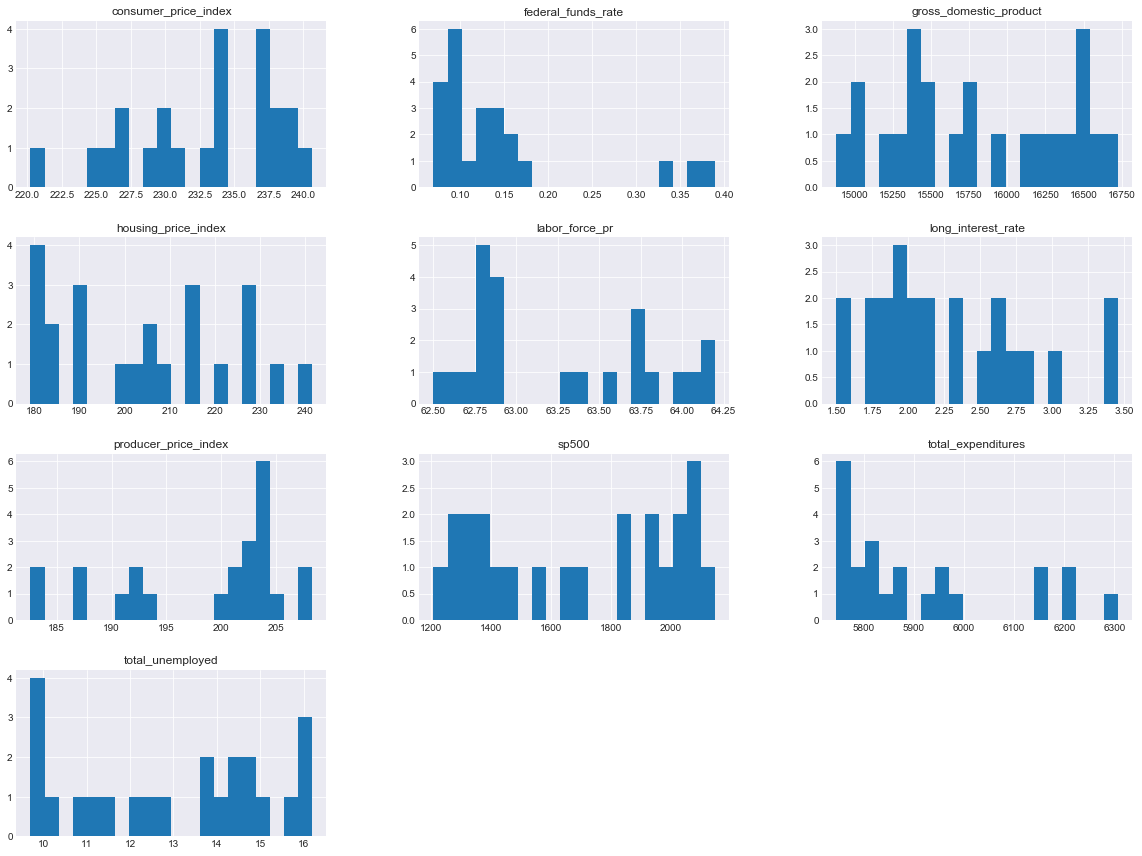

In [12]:
%matplotlib inline

dframe.hist(bins=20, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024F61E240F0>,
      dtype=object)

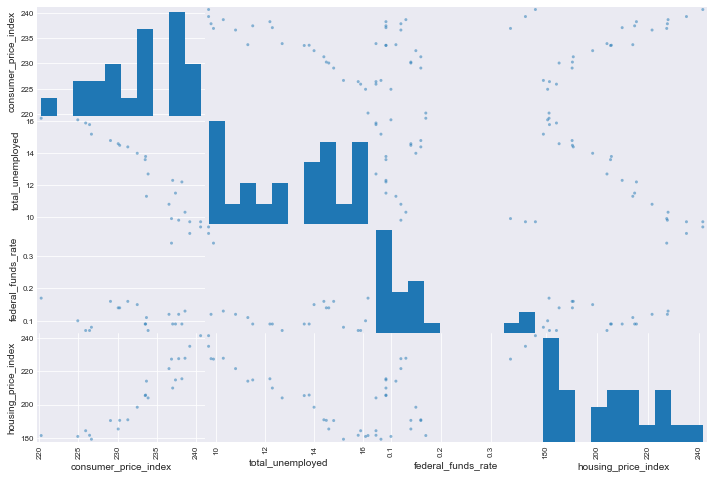

In [13]:
# from pandas.tools.plotting import scatter_matrix 

from pandas.plotting import scatter_matrix

attributes = ['consumer_price_index', 'total_unemployed', 'federal_funds_rate',
           'housing_price_index']

scatter_matrix(dframe[attributes], figsize=(12, 8))

In [15]:
dframe.corr()

,sp500,consumer_price_index,long_interest_rate,housing_price_index,total_unemployed,federal_funds_rate,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
sp500,1.000000,0.923372,-0.268089,0.960468,-0.959047,0.372566,0.781037,-0.941233,-0.496051,0.959274
consumer_price_index,0.923372,1.000000,-0.434417,0.923467,-0.921749,0.384849,0.722605,-0.926848,-0.335281,0.933372
long_interest_rate,-0.268089,-0.434417,1.000000,-0.353817,0.410265,-0.441148,-0.298756,0.295334,0.344231,-0.451033
housing_price_index,0.960468,0.923467,-0.353817,1.000000,-0.975517,0.561913,0.878971,-0.904213,-0.621928,0.976960
total_unemployed,-0.959047,-0.921749,0.410265,-0.975517,1.000000,-0.517291,-0.872403,0.925589,0.641777,-0.991416
federal_funds_rate,0.372566,0.384849,-0.441148,0.561913,-0.517291,1.000000,0.699799,-0.271155,-0.737782,0.510506
total_expenditures,0.781037,0.722605,-0.298756,0.878971,-0.872403,0.699799,1.000000,-0.670171,-0.775035,0.858887
labor_force_pr,-0.941233,-0.926848,0.295334,-0.904213,0.925589,-0.271155,-0.670171,1.000000,0.408029,-0.927290
producer_price_index,-0.496051,-0.335281,0.344231,-0.621928,0.641777,-0.737782,-0.775035,0.408029,1.000000,-0.619440
gross_domestic_product,0.959274,0.933372,-0.451033,0.976960,-0.991416,0.510506,0.858887,-0.927290,-0.619440,1.000000


In [16]:
#define the features and labels
X= dframe.drop(['housing_price_index', 'date'], axis = 1)
y = dframe['housing_price_index']

In [17]:
from sklearn.model_selection import train_test_split

#train test split 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)


In [18]:
# Train a Linear Regression model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
y_predLinear = lin_reg.predict(X_test)

print(y_predLinear)

[212.42599264 197.65405004 175.43477383 191.128081   224.72320571]


In [20]:
from sklearn.metrics import r2_score, mean_squared_error

In [21]:
RMSE_Linear = mean_squared_error(y_test, y_predLinear)**0.5
r2_Linear = r2_score(y_test, y_predLinear)


print('Ridge RMSE:' , RMSE_Linear)
print('Ridge R^2:' , r2_Linear)

Ridge RMSE: 3.196499507868858
Ridge R^2: 0.9545413904870886


In [22]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [23]:
#lasso model

lasso = Lasso(random_state = 42)
lasso_model = lasso.fit(X_train, y_train)

y_predlasso = lasso_model.predict(X_test)

#rootmeansquareerror
RMSE_lasso = mean_squared_error(y_test, y_predlasso)**0.5
r2_lasso = r2_score(y_test,y_predlasso)

print('Lasso RMSE:', RMSE_lasso)
print('Lasso R^2:', r2_lasso)

Lasso RMSE: 4.093739629401065
Lasso R^2: 0.9254397598979576


In [24]:
#Ridge model 

ridge = Ridge(random_state = 42)
ridge_model = ridge.fit(X_train, y_train)

y_predridge = ridge_model.predict(X_test)

RMSE_ridge = mean_squared_error(y_test, y_predridge)**0.5
r2_ridge = r2_score(y_test, y_predridge)

print('Ridge RMSE:' , RMSE_ridge)
print('Ridge R^2:' , r2_ridge)

Ridge RMSE: 2.9058850300938115
Ridge R^2: 0.9624315117997619


In [25]:
print('Test Data: \n', y[:5])
print('Predicted data: \n', y_predridge[:5])

Test Data: 
 0    181.35
1    180.80
2    184.25
3    181.51
4    179.13
Name: housing_price_index, dtype: float64
Predicted data: 
 [214.69823793 197.27102589 175.55284794 191.43023078 224.23433741]


In [26]:
#Ordinary least square model

# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("housing_price_index ~ total_unemployed", data=dframe).fit()

# summarize our model
housing_model_summary = housing_model.summary()


In [27]:
# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
)
)

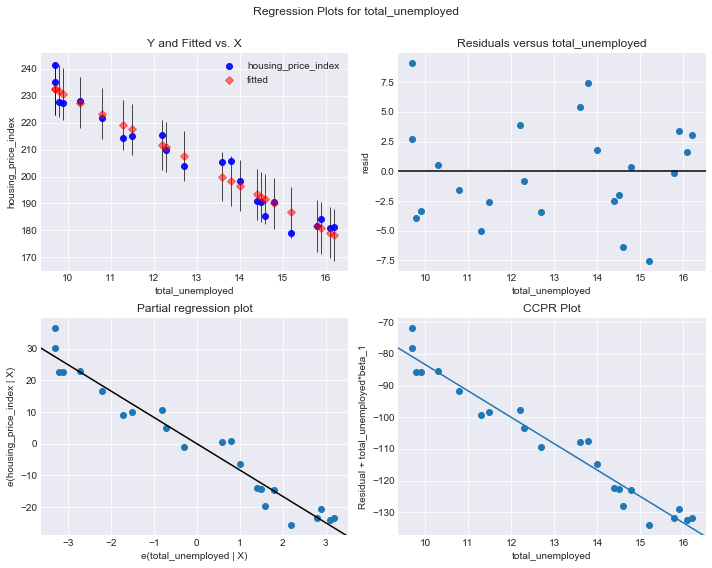

In [28]:
fig = plt.figure(figsize=(10,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(housing_model, "total_unemployed", fig=fig)
#fig = sm.graphics.plot_partregress_grid(housing_model, fig=fig)

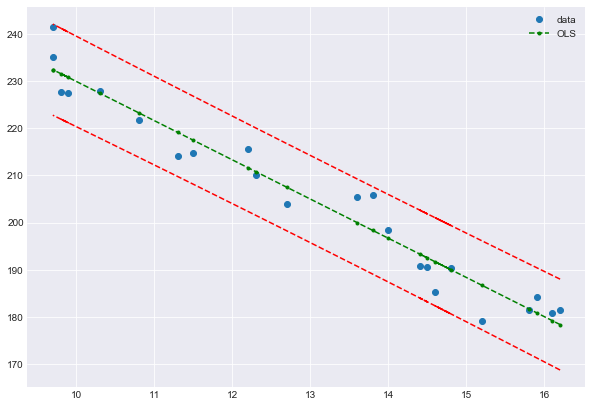

In [29]:
# predictor variable (x) and dependent variable (y)
x = dframe[['total_unemployed']]
y = dframe[['housing_price_index']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, housing_model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [30]:
print(x.head())
print(y.head())

   total_unemployed
0              16.2
1              16.1
2              15.9
3              15.8
4              15.2
   housing_price_index
0               181.35
1               180.80
2               184.25
3               181.51
4               179.13


In [31]:
# again, invoke statsmodel's formula API using the below syntax
housing_model = ols("""housing_price_index ~ total_unemployed 
                                            + long_interest_rate 
                                            + federal_funds_rate
                                            + consumer_price_index 
                                            + gross_domestic_product""", data=dframe).fit()
# summarize our model
housing_model_summary = housing_model.summary()
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#bbbbbb;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#eeee78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#eaeec0;">std err</th>')
    .replace('<th>Kurtosis:</th>', '<th style="background-color:#ebeedc;">Kurtosis:</th>')
    )
)

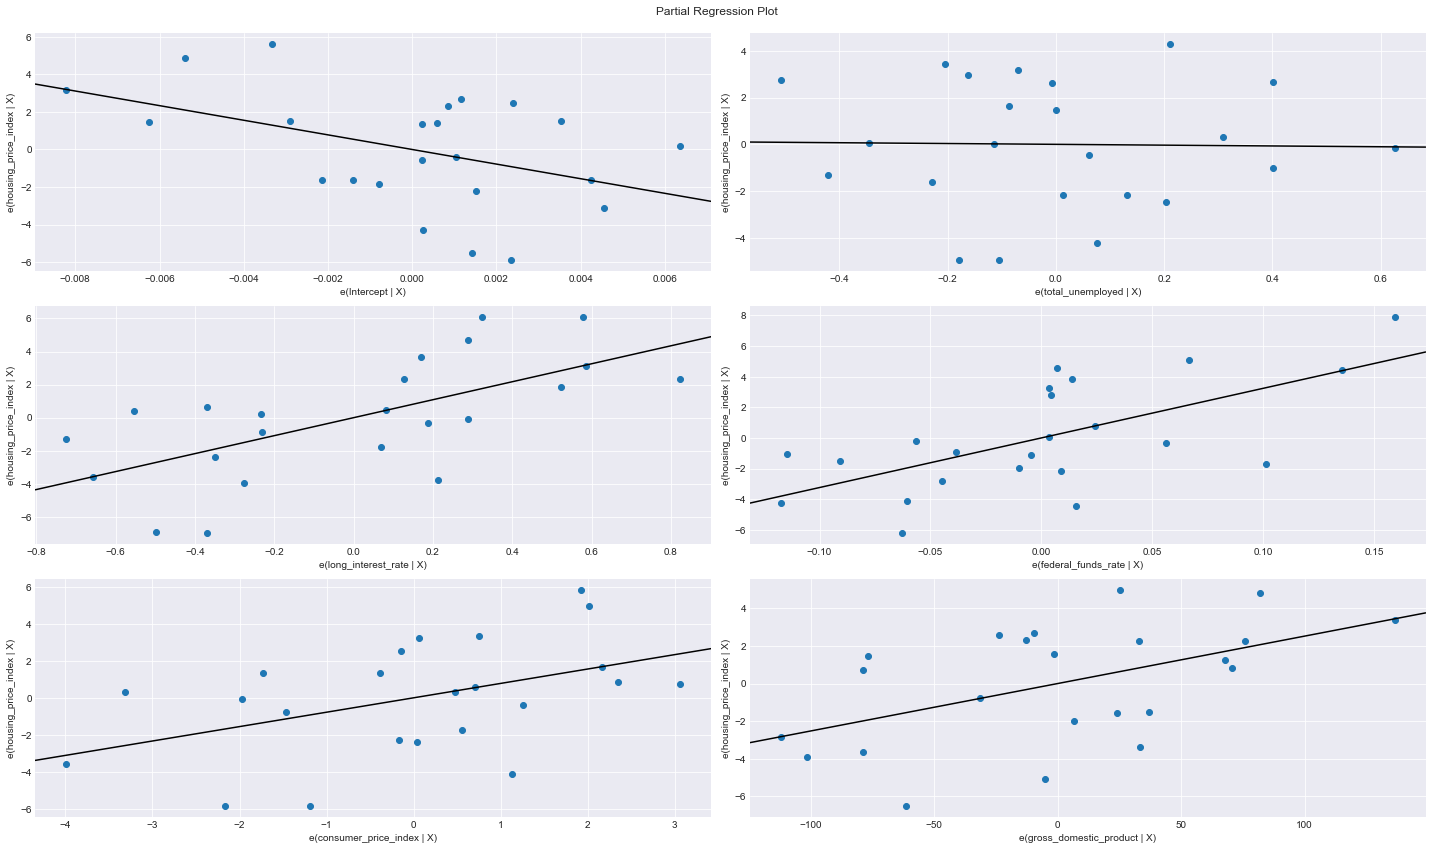

In [32]:
# this produces our six partial regression plots

fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(housing_model, fig=fig)